# Project: House Price Prediction Project Using Machine Learning Models

## Learning Objectives:
Predicting the sales price for each house based on their various characteristics. For each Id in the test set, our ML
models would aim to predict the value of the SalePrice variable.

## Dataset Introduction:
- The full dataset can be found via: https://www.kaggle.com/competitions/home-data-for-ml-course/overview/evaluation
- Contains 79 explanatory variables describing (almost) every aspect of residential homes inAMes, Iowa

## 1. Load Necessary Libraries and Dataset

In [80]:
import pandas as pd
import numpy as np

In [81]:
data = pd.read_csv("./data/train.csv", index_col = 'Id')

In [82]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [83]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Let's see each column and their datatype.

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

I also want to see how much percentage each column has for missing values.

In [85]:
for col in data.columns:
    missing_data = data[col].isna().sum()
    missing_percent = missing_data/len(data)*100
    print(f'Column {col}: has {missing_percent}%')

Column MSSubClass: has 0.0%
Column MSZoning: has 0.0%
Column LotFrontage: has 17.73972602739726%
Column LotArea: has 0.0%
Column Street: has 0.0%
Column Alley: has 93.76712328767123%
Column LotShape: has 0.0%
Column LandContour: has 0.0%
Column Utilities: has 0.0%
Column LotConfig: has 0.0%
Column LandSlope: has 0.0%
Column Neighborhood: has 0.0%
Column Condition1: has 0.0%
Column Condition2: has 0.0%
Column BldgType: has 0.0%
Column HouseStyle: has 0.0%
Column OverallQual: has 0.0%
Column OverallCond: has 0.0%
Column YearBuilt: has 0.0%
Column YearRemodAdd: has 0.0%
Column RoofStyle: has 0.0%
Column RoofMatl: has 0.0%
Column Exterior1st: has 0.0%
Column Exterior2nd: has 0.0%
Column MasVnrType: has 0.547945205479452%
Column MasVnrArea: has 0.547945205479452%
Column ExterQual: has 0.0%
Column ExterCond: has 0.0%
Column Foundation: has 0.0%
Column BsmtQual: has 2.5342465753424657%
Column BsmtCond: has 2.5342465753424657%
Column BsmtExposure: has 2.6027397260273974%
Column BsmtFinType1: h

Let's generate a graph to visualize this result!

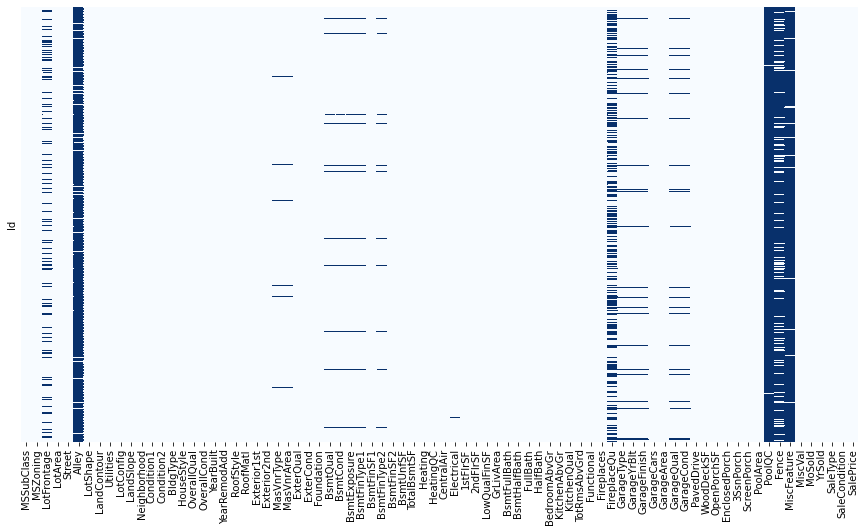

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.isna(), cmap='Blues', cbar=False, yticklabels=False)
plt.show()

### Insights:
- MiscFeature, Alley and FireplaceQu have the highest number of missing values. MiscFeature refers to Miscellaneous feature not covered in other categories. Meanwhile, Alley shows types of alley access of the houses and FireplaceQu
demonstrates FireplaceQu. To confirm whether these features are worth keeping and imputing their NaN values, let's move to feature selection where we determine the correlations among various independent characteristics and our target
variables.

## 2. Feature Selection

In [87]:
corr = data.corr()
corr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


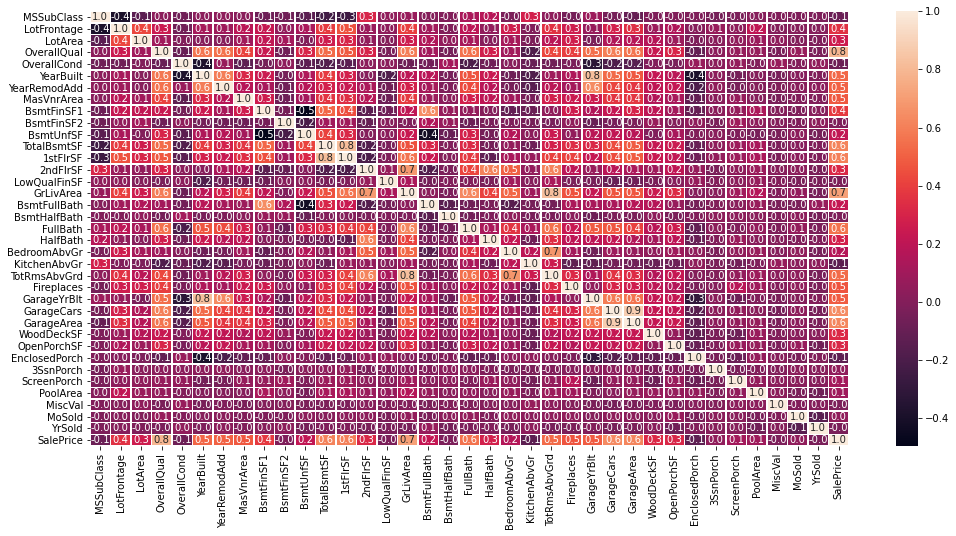

In [88]:
plt.figure(figsize=(17,8))
sns.heatmap(corr, annot=True, fmt='.1f', linecolor='white', linewidth=0.5)
plt.show()

### Insights:
- Since we aim to predict the values of a house based on its important features, our Machine Learning model would implement
regression method, and hence, we would prioritise features with numeric/non-categorical values first
- From the heatmap above, there is no multicollinearity appeared that can affect our model accuracy
- We would proceed to select the top features (with numeric values) namely: LotArea, YearBuilt, OverallQual, 1stFlrSF,
    2ndFlrSF, FullBath, BedroomAbvGr, TotRmsAbvGrd)

In [89]:
features = ['LotArea', 'YearBuilt','OverallQual', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr',
           'TotRmsAbvGrd']

In [90]:
# Split data into X and y dataframe
X = data[features]
y = data['SalePrice']

In [91]:
X.head()

,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,
1,8450,2003,7,856,854,2,3,8
2,9600,1976,6,1262,0,2,3,6
3,11250,2001,7,920,866,2,3,6
4,9550,1915,7,961,756,1,3,7
5,14260,2000,8,1145,1053,2,4,9


In [92]:
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

## 3. Split Dataset into X and Y

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=0)

In [94]:
X_train.shape

(1168, 8)

In [95]:
X_valid.shape

(292, 8)

In [96]:
X.shape

(1460, 8)

## 4. Train Machine Learning Model

In [97]:
# We can start by using deicion tree model
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)

In [98]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [99]:
y_preds = dt_model.predict(X_valid)

In [100]:
y_preds[:5]

array([257500., 113000., 134800., 205000.,  89500.])

In [101]:
pd.DataFrame({'y': y_valid.head(), 'y_preds': y_preds[:5]})

,y,y_preds
Id,,
530,200624,257500.0
492,133000,113000.0
460,110000,134800.0
280,192000,205000.0
656,88000,89500.0


In [104]:
# Random Forest can also be used to predict new values
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [106]:
rf_val_preds = rf_model.predict(X_valid)

In [107]:
rf_val_preds[:5]

array([235595.5 , 138605.5 , 118191.43, 206872.6 ,  94763.  ])

## 5. Predict With A New Input

In [108]:
X_valid.head()

,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,,
530,32668,1957,6,2515,0,3,4,9
492,9490,1941,6,958,620,1,3,5
460,7015,1950,5,979,224,1,3,5
280,10005,1977,7,1156,866,2,4,8
656,1680,1971,6,525,567,1,3,6


After having built our models using Random Forest, I would use the ML model to predict the price of a new house
containing the following features:
- Lot Area: 6969
- Year Built: 2021
- Overall Quality: 8
- 1stFlrSF: 1000
- 2ndFlrSF: 800
- Full Bath: 4
- Bedroom Above Basement Level: 5
- Total Rooms Above Ground: 8

In [110]:
# Try to input new values into our model
rf_model.predict([[6969, 2021, 8, 1000, 800, 4, 5, 8]])

array([247366.78])

Our predicted value of price for this house is 247,366.78 US Dollars! Just a simple Regression Machine Learning Model
can tell us roughly how much a house with different features worth.

## 6. Conclusion
I definitely have so much fun exploring this dataset and building a simple Machine Learning model using concepts that
I've learnt. I look forward to applying more advanced concepts such as:
- Model Selections (Which metrics to use to evaluate your model's performance?)
- Model Improvement (Fine tuning hyparameters, advanced feature engineering)